## Final Project Submission

Please fill out:
* Student name: Jelena Sinclair
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 14 May 2023
* Instructor name: Hardik Idnani
* GitHub URL: https://github.com/JelenaSinclair/project_one.git


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

# **Importing data** 

In [2]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_name_basic=pd.read_csv('zippedData\imdb.name.basics.csv.gz')
imdb_title_akas=pd.read_csv('zippedData\imdb.title.akas.csv.gz')
imdb_title_basic=pd.read_csv('zippedData\imdb.title.basics.csv.gz')
imdb_title_crew=pd.read_csv('zippedData\imdb.title.crew.csv.gz')
imdb_title_principals=pd.read_csv('zippedData\imdb.title.principals.csv.gz')
imdb_title_ratings=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
tmdb=pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_movie_budgets=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
rt_movie_info=pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter='\t')
rt_reviews=pd.read_csv('zippedData/rt.reviews.tsv.gz',delimiter='\t', encoding='latin-1')

# Investigate budget required to make successful movies

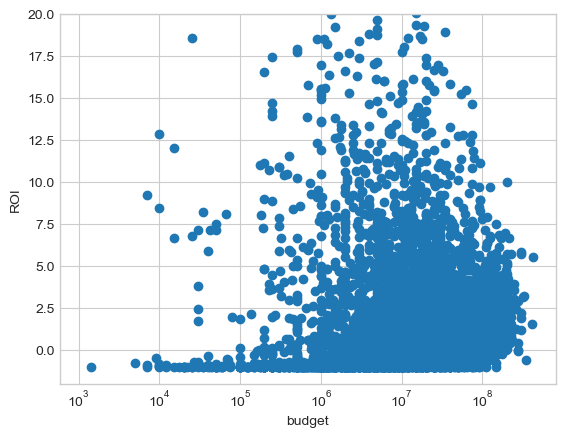

In [3]:
# Changing the data type of 'tn_movie_budgets'['production_budget'] from string with $ to INT
tn_movie_budgets[tn_movie_budgets.columns[3:6]] = tn_movie_budgets[tn_movie_budgets.columns[3:6]].replace('[\$,]', '', regex=True).astype(float)

# Creating a PROFIT calculated column
tn_movie_budgets['profit'] = (tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget'])/1e6

# Creating a return on investment (ROI) calculated column
tn_movie_budgets['ROI'] = (tn_movie_budgets['profit'])*1e6/tn_movie_budgets['production_budget'] 

# Scatter plot of budget over all time and ROI
plt.scatter(tn_movie_budgets['production_budget'],tn_movie_budgets['ROI']);
plt.ylim(ymax=20,ymin=-2)
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('ROI')
plt.xlabel('budget');

Maximum year: 2020


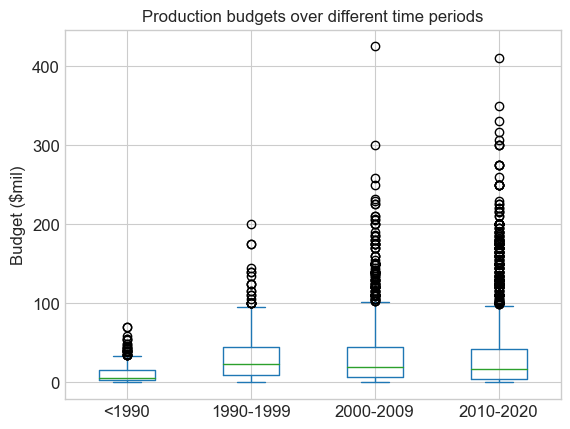

In [4]:
# Creating a YEAR column in 'tn_movie_budgets' based on release date string
tn_movie_budgets['year'] = tn_movie_budgets['release_date'].str[-4:].astype(int)

# check latest year
print('Maximum year: ' + str(tn_movie_budgets['year'].max()))

# Creating a decade range column - maximum year in data is 2020
tn_movie_budgets['decade'] = '<1990'
tn_movie_budgets.loc[(tn_movie_budgets['year']>=1990)&
                     (tn_movie_budgets['year']<2000),'decade'] = '1990-1999'
tn_movie_budgets.loc[(tn_movie_budgets['year']>=2000)&
                     (tn_movie_budgets['year']<2010),'decade'] = '2000-2009'
tn_movie_budgets.loc[(tn_movie_budgets['year']>=2010),'decade'] = '2010-2020'

# Creating a production budget column in millions to make numbers easier to work with
tn_movie_budgets['budget_mil'] = tn_movie_budgets['production_budget']/1e6

# Plot a boxplot of budgets in each decade to see distribution
tn_movie_budgets.plot.box(column='budget_mil',by='decade',positions=[1,2,3,0])
plt.title('Production budgets over different time periods')
plt.ylabel('Budget ($mil)',fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

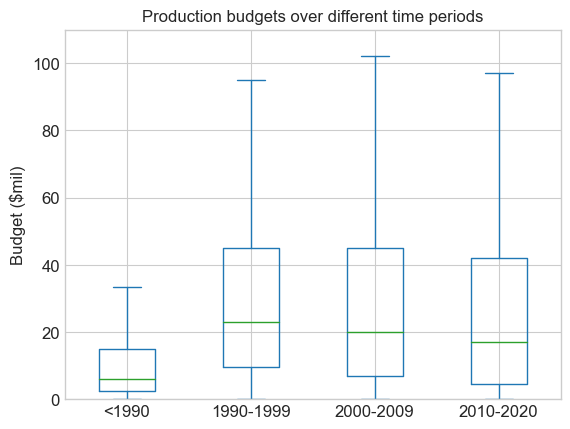

In [5]:
# Replot without outliers
tn_movie_budgets.plot.box(column='budget_mil',by='decade',positions=[1,2,3,0],showfliers=False)
plt.title('Production budgets over different time periods')
plt.ylabel('Budget ($mil)',fontsize=12)
plt.ylim(0,110)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

# What level of investment is likely to yield returns?

In [6]:
# Take just the data after 2010
budgets_post2010 = tn_movie_budgets[tn_movie_budgets['year']>=2010].copy()

# look at spread of post 2010 data
budgets_post2010.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,ROI,year,budget_mil
count,2194.000000,2.194000e+03,2.194000e+03,2.194000e+03,2194.000000,2194.000000,2194.00000,2194.000000
mean,50.496809,3.653347e+07,4.411203e+07,1.118934e+08,75.359886,2.210431,2013.83546,36.533472
std,28.508464,5.154415e+07,7.979735e+07,2.152202e+08,177.111072,10.508915,2.57895,51.544152
min,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,-200.237650,-1.000000,2010.00000,0.001400
25%,26.000000,4.500000e+06,9.377150e+04,1.023780e+06,-2.000000,-0.784258,2012.00000,4.500000
50%,51.000000,1.690000e+07,1.279090e+07,2.752135e+07,8.366398,0.589178,2014.00000,16.900000
75%,75.000000,4.200000e+07,5.332470e+07,1.132702e+08,71.423355,2.517032,2016.00000,42.000000
max,100.000000,4.106000e+08,9.366622e+08,2.053311e+09,1748.134200,415.564740,2020.00000,410.600000


In [7]:
# 25th percentile is $4.5 mil, median is ~$17 mil, 75th percentile $42 mil. Use as a guide for grouping movies
# into different budget range categories
budget_ranges = ['<5','5-20','20-50','50+']

# Creating a budget_range column using ranges of <5mil, 5-20 mil, 20-50mil, 50+
budgets_post2010['budget_range'] = budget_ranges[0]
budgets_post2010.loc[(budgets_post2010['production_budget']>=5e6)&
                     (budgets_post2010['production_budget']<20e6),'budget_range'] = budget_ranges[1]
budgets_post2010.loc[(budgets_post2010['production_budget']>=20e6)&
                     (budgets_post2010['production_budget']<50e6),'budget_range'] = budget_ranges[2]
budgets_post2010.loc[(budgets_post2010['production_budget']>=50e6),'budget_range'] = budget_ranges[3]

In [8]:
# table of what level of investment works best

succr = [] #success rate (% movies ROI>0)
for br in budget_ranges:
    tmp = budgets_post2010[(budgets_post2010['budget_range']==br)]
    tmp = round((len(tmp[tmp['ROI']>0]))/len(tmp)*100)
    succr.append(tmp)
    
table = pd.DataFrame({
    "ROI > 0 (%)": succr,
   # "Fail (%)": 100-np.array(succr)
   
})
table.style \
 .format(precision=3, thousands=".", decimal=",") \
 .format_index(str.upper, axis=1) \
 .relabel_index(budget_ranges, axis=0)


,ROI > 0 (%)
<5,30
5-20,57
20-50,71
50+,87


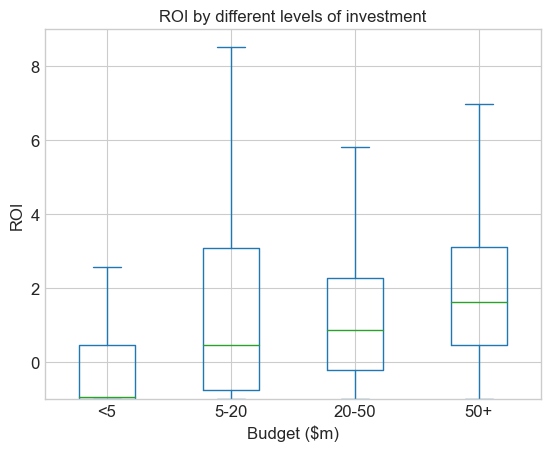

In [9]:
# box plots for ROI by different level of investment <5m,5m-20m,20m-50m,>50m
budgets_post2010.plot.box(column='ROI',by='budget_range',positions=[2,1,3,0],showfliers=False)
plt.title('ROI by different levels of investment')
plt.xlabel('Budget ($m)',fontsize=12)
plt.ylabel('ROI',fontsize=12)
plt.ylim(-1,9)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

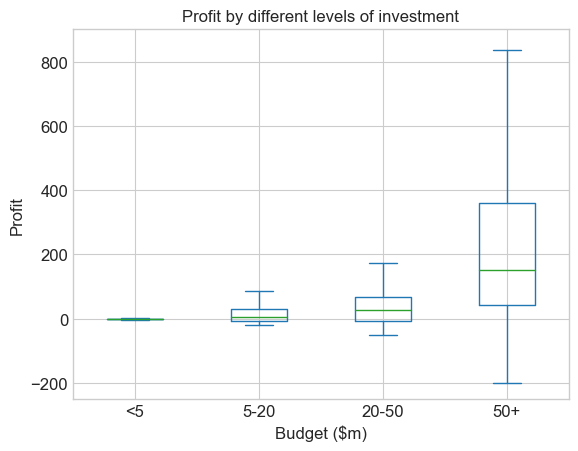

In [10]:
# box plots for PROFIT by different level of investment <5m,5m-20m,20m-50m,>50m
budgets_post2010.plot.box(column='profit',by='budget_range',positions=[2,1,3,0],showfliers=False)
plt.title('Profit by different levels of investment')
plt.xlabel('Budget ($m)',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.ylim(ymax=900,ymin=-250);
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

# How to make a successful movie?

### Genre

Investigate which genres are best
Genre data in imdb_title_basic. Combine with budget_post2010

In [11]:
#  RENAMING 'movie' column  to 'title' for joining with imdb files
budgets_post2010.rename(columns = {'movie':'title'},inplace=True)

#  RENAMING imdb_title_basic 'primary_title' column  to 'title' for joining with budgets
imdb_title_basic.rename(columns = {'primary_title':'title'},inplace=True)

# JOINING tn_movie_budgets and imdb_title_basic (data 2010 onwards) based on 'title'
budget_title_basic_join = pd.merge(budgets_post2010,imdb_title_basic,on = 'title', how='inner')

# Joining only on 'title' will create multiple entries for movies with the same name 
# (e.g. multiple titles with same budget info)
# 'title' only reliable field to join on, as can't guarantee budget 'release_date' year matches imdb 'start_year'
# Get rid of any duplicates
budget_title_basic_join.drop_duplicates(subset=['title'],inplace=True,keep=False)

# Creating copy in which genres (concatenated strings) can be separated into individual rows
budget_title_genre = budget_title_basic_join.copy()

# SPLITTING the 'genres' column into individual rows. 
budget_title_genre = budget_title_genre.assign(genres = budget_title_genre.genres.str.split(",")).explode('genres')

# Removing nan values from genre from budget_title_genre (data 2010 onwards)
clean_budget_title = budget_title_genre[~budget_title_genre['genres'].isna()]

# List of genres sorted alphabetically
genres_list = clean_budget_title['genres'].unique()
genres_list.sort()

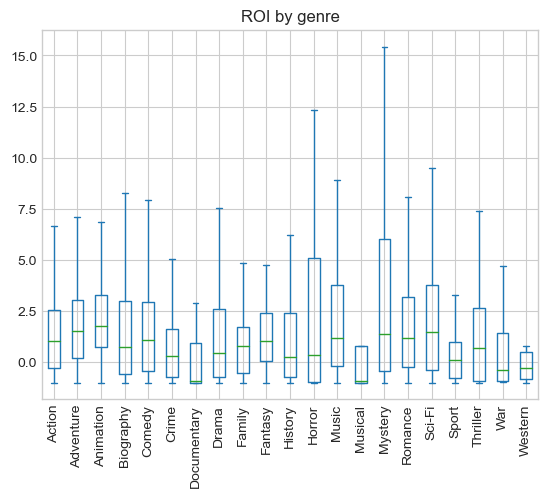

In [12]:
# Investigating ROI by genre as a boxplot
clean_budget_title.plot.box(column='ROI',by='genres',rot=90, showfliers=False)
plt.title('ROI by genre');
#plt.ylim(-1,12);


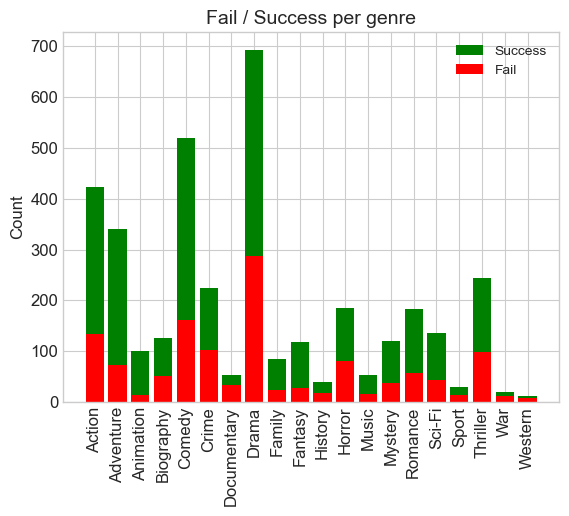

In [13]:
# Investigate number of movies per genre, including whether they were successful (ROI>0)
tcnt = [] # total number of movies per genre
fcnt = [] # number of movies ROI<=0
glist_mod = [] # new genres list with >10 movies per genre
for genre in genres_list:
   flop = len(clean_budget_title[(clean_budget_title['genres']==genre)&(clean_budget_title['ROI']<=0)])
   tot = len(clean_budget_title[(clean_budget_title['genres']==genre)])
   # only look at genres with more than 10 movies in them
   if tot>10:
        tcnt.append(tot)
        fcnt.append(flop)
        glist_mod.append(genre)

# plot bar chart of total movies per genre and number of fails
# number of fails plotted in front of total number, so end result looks like successes on fails
plt.bar(glist_mod,tcnt,tick_label=glist_mod,color='green')
plt.bar(glist_mod,fcnt,tick_label=glist_mod,color='red')
plt.xticks(rotation=90,fontsize=12)
plt.title('Fail / Success per genre',fontsize=14)
plt.ylabel('Count',fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels=['Success','Fail']);

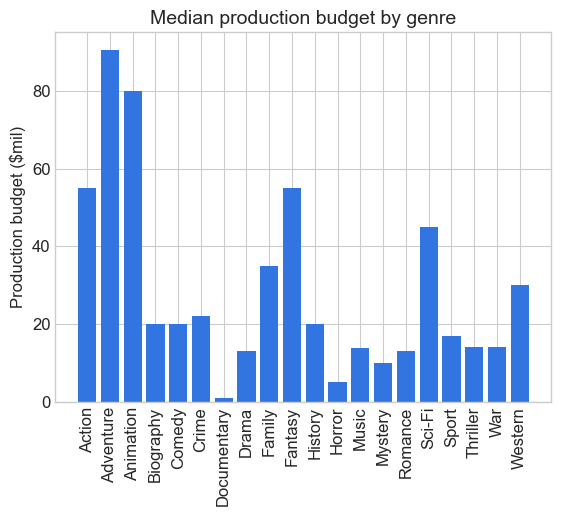

In [14]:
# median production budget by genre (genres with >10 movies)
med_bud = []
for genre in glist_mod:
   med_bud.append(clean_budget_title[(clean_budget_title['genres']==genre)]['budget_mil'].median())

plt.bar(glist_mod,med_bud,color='#3275E1')
plt.xticks(rotation=90,fontsize=12)
plt.title('Median production budget by genre',fontsize=14)
plt.ylabel('Production budget ($mil)',fontsize=12)
plt.yticks(fontsize=12);

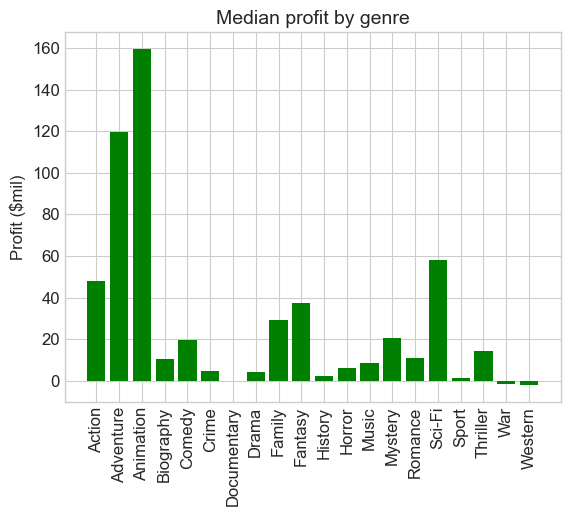

In [15]:
# median profit by genre
med_pro = []
for genre in glist_mod:
   med_pro.append(clean_budget_title[clean_budget_title['genres']==genre]['profit'].median())
plt.bar(glist_mod,med_pro, color='green')
plt.xticks(rotation=90,fontsize=12)
plt.title('Median profit by genre',fontsize=14)
plt.ylabel('Profit ($mil)',fontsize=12)
plt.yticks(fontsize=12);

Animation and adventure make the biggest profits (from bigger production budgets)
What about ROI?

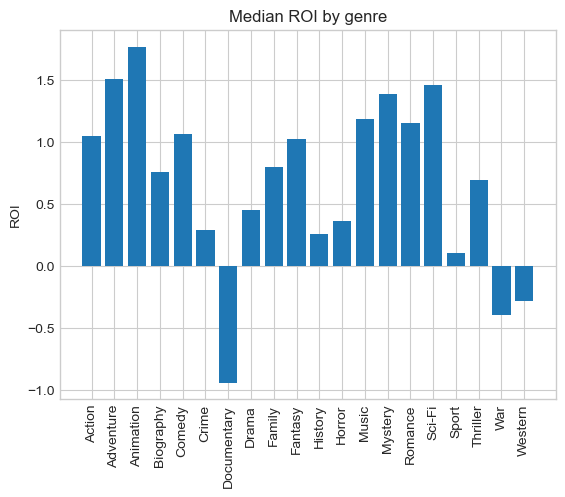

In [16]:
# median ROI by genre
med_roi = [] # median ROI by genre
for genre in glist_mod:
   med_roi.append(clean_budget_title[clean_budget_title['genres']==genre]['ROI'].median())
plt.bar(glist_mod,med_roi)
plt.title('Median ROI by genre')
plt.xticks(rotation=90)
plt.ylabel('ROI');
#plt.ylim(0,10)

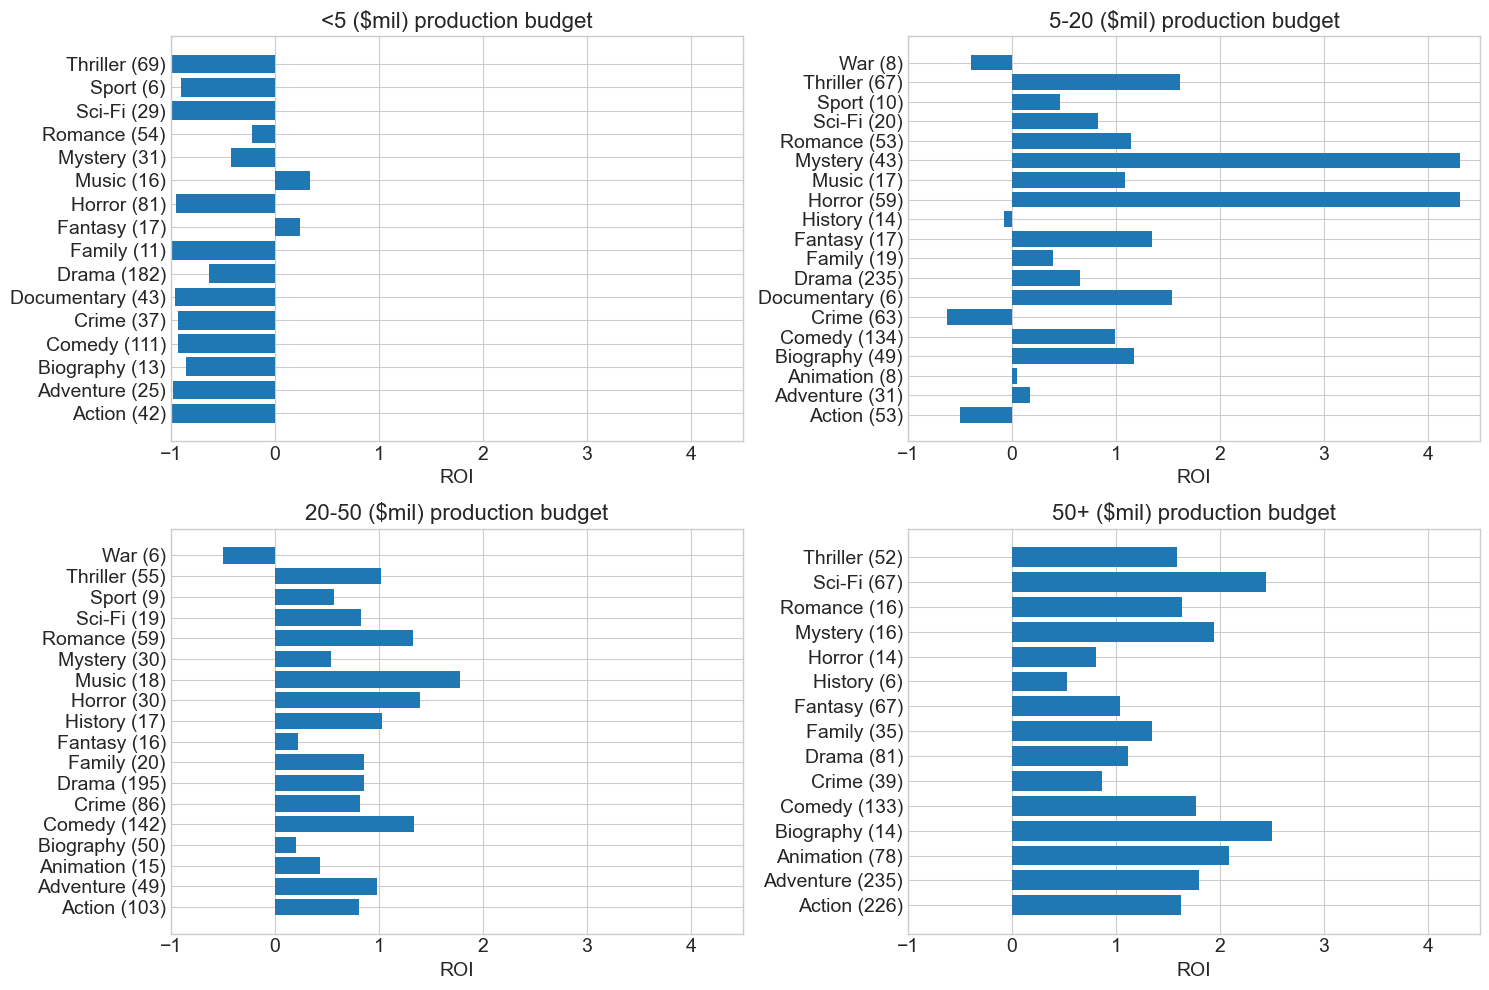

In [17]:
# BAR median ROI by genre and budget category
# genres with small number of movies in a budget category can distort the graph, so also limit the graphs to
# only include genres with more than 5 movies in that genre/budget category
# also show number of movies per genre in yticklabels

# create grid of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
axs = [ax1,ax2,ax3,ax4]
ax_ind = 0;

# loop for each budget range
for bud in budget_ranges:
    
    tmp = clean_budget_title[(clean_budget_title['budget_range']==bud)] # get budget range data
    med_ROI = [] # median ROI per genre
    genre_num = [] # list of genres with >5 movies in this budget range with number of movies appended
    # loop for each genre
    for genre in glist_mod:
       if len(tmp[tmp['genres']==genre])>=5: # if more than 5 movies in this genre/budget
           med_ROI.append(tmp[tmp['genres']==genre]['ROI'].median())
           genre_num.append(genre + ' (' + str(len(tmp[tmp['genres']==genre]['ROI'])) + ')') # append num movies to genre
    
    # select subplot axes
    ax = axs[ax_ind]
    ax_ind = ax_ind+1
        
    ax.barh(genre_num,med_ROI)
    ax.set_title(bud + ' ($mil) production budget', fontsize=16)
    ax.set_xlim(-1,4.5)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.set_xlabel('ROI',fontsize=14)

# prevent labels from overlapping other subplots
plt.tight_layout()

Budget category influences genre ROIs
As before, stay away from low budget (<5) as almost every genre loses money
Mystery and Horror are best in 5-20m budget range
Music, Horror, Romance and Comedy are best in 20-50m range
Stay away from War movies (and in general)
In 50+, all genres with >5 movies are making money. Sci-Fi, biography, animation, and mystery are best
Make an animated sci-fi, biography mystery movie :)
A lot (>100) of adventure, action, comedy movies are made in 50+, all of which have solid performance (>1.5 ROI)

### Directors/Writers

In [18]:
# JOINING 'budget_title_basic_join' and 'imdb_title_crew' on 'tconst'
budgets_crew = pd.merge(budget_title_basic_join,imdb_title_crew,on = 'tconst', how='inner')

# Creating directors DATABASE - Copy of budgets_crew_basic dataframe
directors = budgets_crew.copy()

# Creating writers DATABASE -  Copy of budgets_crew_basic dataframe
writers = budgets_crew.copy()

#  RENAMING 'directors' column  to 'nconst' for joining
directors.rename(columns = {'directors':'nconst'},inplace=True)

#  RENAMING 'writers' column  to 'nconst'  for joining
writers.rename(columns = {'writers':'nconst'},inplace=True)

# SPLITTING the 'writers' column into individual rows. 
writers = writers.assign(nconst=writers.nconst.str.split(",")).explode('nconst')

# JOINING 'writers' and 'imdb_name_basic'
writers_budget= pd.merge(writers,imdb_name_basic,on = 'nconst', how='inner')

# SPLITTING the 'directors' column into individual rows. 
directors = directors.assign(nconst=directors.nconst.str.split(",")).explode('nconst')

# JOINING 'directors' and 'imdb_name_basic'
directors_budget= pd.merge(directors,imdb_name_basic,on = 'nconst', how='inner')

#### Directors analysis

In [19]:
# List of directors
dir_list = directors_budget['primary_name'].unique()

mcnt = [] # movie count
roi0cnt = [] # ROI<=0 count
med_ROI = [] # median ROI
med_bud = [] # median budget
hi_ROI = [] # highest ROI
lo_ROI = [] # lowest ROI
genres = [] 

# loop for each director
for direc in dir_list:
   
   mcnt.append(len(directors_budget[directors_budget['primary_name']==direc]))
   roi0cnt.append(len(directors_budget[(directors_budget['primary_name']==direc)&(directors_budget['ROI']<=0)]))
   med_ROI.append(directors_budget[directors_budget['primary_name']==direc]['ROI'].median())
   med_bud.append(directors_budget[directors_budget['primary_name']==direc]['budget_mil'].median())
   hi_ROI.append(directors_budget[directors_budget['primary_name']==direc]['ROI'].max())
   lo_ROI.append(directors_budget[directors_budget['primary_name']==direc]['ROI'].min())
   # directors can have multiple combinations of genres in comma-separated strings from different movies. Need to combine
   # Split each directors genre strings into individual genres, make unique list, abbreviate genres to first 3 letters
   # turn back into comma-separated string
   glist = directors_budget[directors_budget['primary_name']==direc]
   glist = glist.assign(genres=glist.genres.str.split(",")).explode('genres')
   for genre in genres_list:
       glist.loc[glist['genres']==genre,'genres'] = genre[0:3]
   gstr = ','.join(glist[~glist['genres'].isna()]['genres'].unique())
   genres.append(gstr)

# combine into dataframe
directors_mod = pd.DataFrame(data={'# movie':mcnt,'ROI<=0':roi0cnt,
                                   'median ROI':med_ROI,
                                   'min ROI':lo_ROI,'max ROI':hi_ROI,'median budget ($mil)':med_bud,'genres':genres},index=dir_list) 


In [20]:
# Identify top 5 directors who have made at least 3 movies with no ROI<=0, sorted by median ROI
top5 = directors_mod[(directors_mod['ROI<=0']==0)
                      &(directors_mod['# movie']>2)].sort_values(by=['median ROI'], ascending=False).round(2)
top5.head(5)

,# movie,ROI<=0,median ROI,min ROI,max ROI,median budget ($mil),genres
Pierre Coffin,4,0,12.31,6.88,14.68,74.5,"Adv,Ani,Com,Fam"
Christopher Landon,4,0,11.66,0.04,24.00,7.0,"Act,Com,Hor,Dra,Mys,Thr"
James DeMonaco,3,0,11.39,10.85,29.42,9.0,"Act,Hor,Sci,Thr"
James Wan,4,0,10.95,6.17,65.58,90.0,"Act,Cri,Thr,Adv,Fan,Hor,Mys"
Jake Kasdan,3,0,9.72,2.15,10.34,40.0,"Act,Adv,Com,Rom"


#### Writers analysis

In [ ]:
# List of writers
wri_list = writers_budget['primary_name'].unique()

mcnt = [] # movie count
roi0cnt = [] # ROI<=0 count
med_ROI = [] # median ROI
med_bud = [] # median budget
hi_ROI = [] # highest ROI
lo_ROI = [] # lowest ROI
genres = [] 

# loop for each director
for writer in wri_list:
   
   mcnt.append(len(writers_budget[writers_budget['primary_name']==writer]))
   roi0cnt.append(len(writers_budget[(writers_budget['primary_name']==writer)&(writers_budget['ROI']<=0)]))
   med_ROI.append(writers_budget[writers_budget['primary_name']==writer]['ROI'].median())
   med_bud.append(writers_budget[writers_budget['primary_name']==writer]['budget_mil'].median())
   hi_ROI.append(writers_budget[writers_budget['primary_name']==writer]['ROI'].max())
   lo_ROI.append(writers_budget[writers_budget['primary_name']==writer]['ROI'].min())
   # writers can have multiple combinations of genres in comma-separated strings from different movies. Need to combine
   # Split each writers genre strings into individual genres, make unique list, abbreviate genres to first 3 letters
   # turn back into comma-separated string
   glist = writers_budget[writers_budget['primary_name']==writer]
   glist = glist.assign(genres=glist.genres.str.split(",")).explode('genres')
   for genre in genres_list:
       glist.loc[glist['genres']==genre,'genres'] = genre[0:3]
   gstr = ','.join(glist[~glist['genres'].isna()]['genres'].unique())
   genres.append(gstr)

# combine into dataframe
writers_mod = pd.DataFrame(data={'# movie':mcnt,'ROI<=0':roi0cnt,
                                   'median ROI':med_ROI,
                                   'min ROI':lo_ROI,'max ROI':hi_ROI,'median budget ($mil)':med_bud,'genres':genres},index=wri_list) 


In [ ]:
# Identify top 5 writers who have made at least 3 movies with no ROI<=0, sorted by median ROI
top5 = writers_mod[(writers_mod['ROI<=0']==0)
                      &(writers_mod['# movie']>2)].sort_values(by=['median ROI'], ascending=False).round(2)
top5.head(5)